In [1]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from typing import Tuple, List

print(os.getcwd())

i:\我的雲端硬碟\Bio_Lab\碩論\code\benchmark\notebook


### model prediction distribution

In [3]:
tar_files = {
    'BaseCNN-gm12878(1kb)': '../output\XAI\BaseCNN-gm12878.ctcf-1kb/attribution.h5',
    'BaseCNN-helas3(1kb)': '../output\XAI\BaseCNN-helas3.ctcf-1kb/attribution.h5',
    'MCIENet-gm12878(1kb)': '../output\XAI\MCIENet-gm12878.ctcf-1kb/attribution.h5',
    'MCIENet-helas3(1kb)': '../output\XAI\MCIENet-helas3.ctcf-1kb/attribution.h5',
    'BaseCNN-gm12878(3kb)': '../output\XAI\BaseCNN-gm12878.ctcf-3kb/attribution.h5',
    'BaseCNN-helas3(3kb)': '../output\XAI\BaseCNN-helas3.ctcf-3kb/attribution.h5',
    'MCIENet-gm12878(3kb)': '../output\XAI\MCIENet-gm12878.ctcf-3kb/attribution.h5',
    'MCIENet-helas3(3kb)': '../output\XAI\MCIENet-helas3.ctcf-3kb/attribution.h5'
}

output_folder = '../output/XAI-plot/'

os.makedirs(output_folder, exist_ok=True)

tar_phase = 'test'

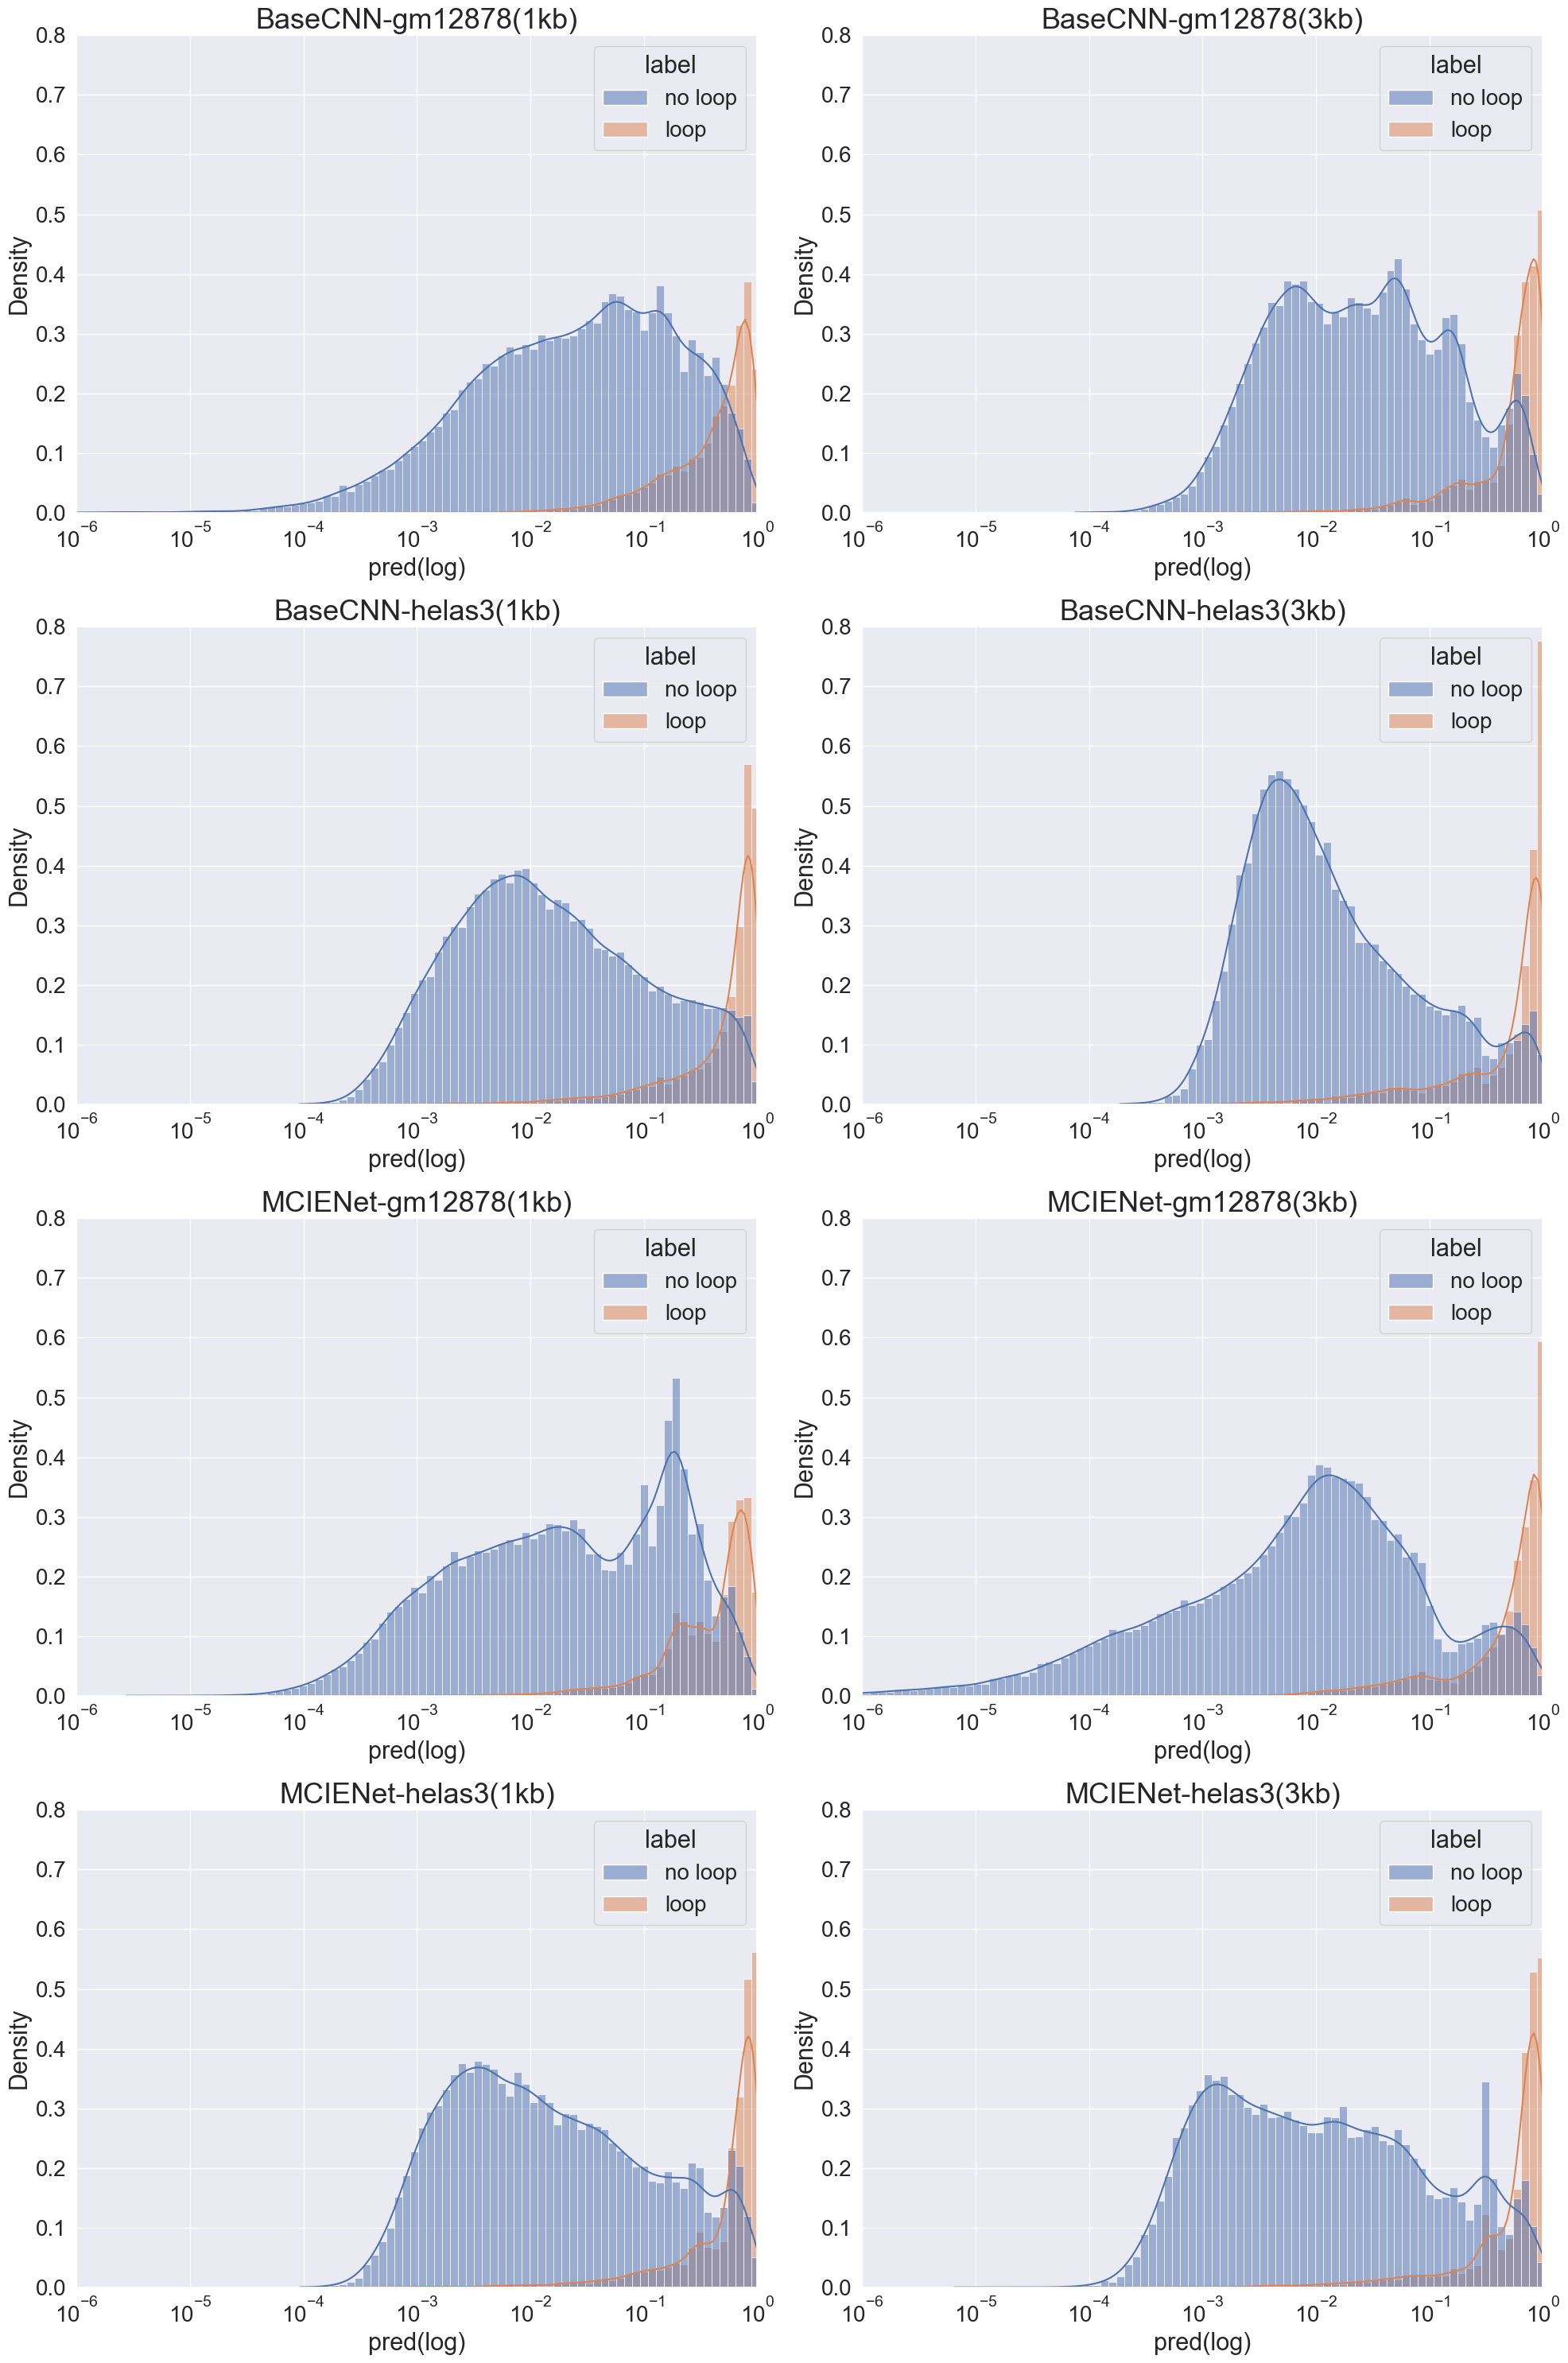

In [21]:
# 文字全局大小
plt.rcParams['font.size'] = 16  # 設定全局字體大小
plt.rcParams['legend.fontsize'] = 20  # 設定圖例字體大小
plt.rcParams['legend.title_fontsize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.rcParams['axes.labelsize'] = 22  # 設定 x 和 y 軸標籤字體大小
plt.rcParams['axes.titlesize'] = 26  # 設定圖標題字體大小

# 圖格局
col_num = 2
row_num = int(np.ceil(len(tar_files.items()) / col_num))

fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=(20, 30))  # 調整圖形大小

# 顯示範圍
x_lim_left = 0.000001
y_lim_right = 0.8

# 在每個 subplot 上繪圖
n = 0
tar_ls = list(tar_files.items())
for i in range(col_num):
    for j in range(row_num):
        # read file
        name, path = tar_ls[n]
        
        with h5py.File(path) as f:
            # build table
            df_pred_lab = pd.DataFrame({
                'label': f[tar_phase]['label'], 
                'pred(log)': [i[1] for i in f[tar_phase]['pred']]
            })
            df_pred_lab['label'] = df_pred_lab['label'].map({0: 'no loop', 1: 'loop'})
        
        tar_ax = axes[j, i]

        # plot distribution
        sns.histplot(ax=tar_ax, data=df_pred_lab,
                     x='pred(log)', hue='label', bins=100, binrange=(np.log10(x_lim_left), 1),
                     kde=True, log_scale=True, stat="density")
        tar_ax.set_title(name)

        # 限制顯示範圍
        tar_ax.set_xlim(x_lim_left, 1)
        tar_ax.set_ylim(0, y_lim_right)

        n+=1


plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'model-prediction-distribution-1kb.png'))
